In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Carico i dati dal csv indicato in remoto in un df
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

#### Si richiede di verificare le dimensioni del dataset e i relativi metadati; ####

In [2]:
df.shape

(404433, 67)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404433 entries, 0 to 404432
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    404433 non-null  object 
 1   continent                                   385091 non-null  object 
 2   location                                    404433 non-null  object 
 3   date                                        404433 non-null  object 
 4   total_cases                                 365420 non-null  float64
 5   new_cases                                   393220 non-null  float64
 6   new_cases_smoothed                          391990 non-null  float64
 7   total_deaths                                342783 non-null  float64
 8   new_deaths                                  393598 non-null  float64
 9   new_deaths_smoothed                         392368 non-null  float64
 

##### Converto la colonna date in formato datetime di pandas

In [4]:
df["date"] = pd.to_datetime(df["date"])

#### Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; <br> Si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [5]:
pd.options.display.float_format = '{:.0f}'.format
df.groupby("continent")["new_cases"].sum()

continent
Africa           13144058
Asia            301497492
Europe          252608917
North America   124572621
Oceania          14957117
South America    68839423
Name: new_cases, dtype: float64

#### Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); ####

##### Per le categorie senza continente possiamo osservare che ci sono delle categorie basate sul reddito, cioè High income, Upper middle income, Lower middle income e Low income.

In [6]:
df.loc[df["continent"].isna()]["location"].value_counts()

Asia                   1616
Europe                 1616
European Union         1616
High income            1616
Lower middle income    1616
Upper middle income    1616
World                  1616
North America          1614
Africa                 1604
Low income             1604
Oceania                1604
South America          1604
Name: location, dtype: int64

##### Andiamo a calcolarci i descrittori richiesti:

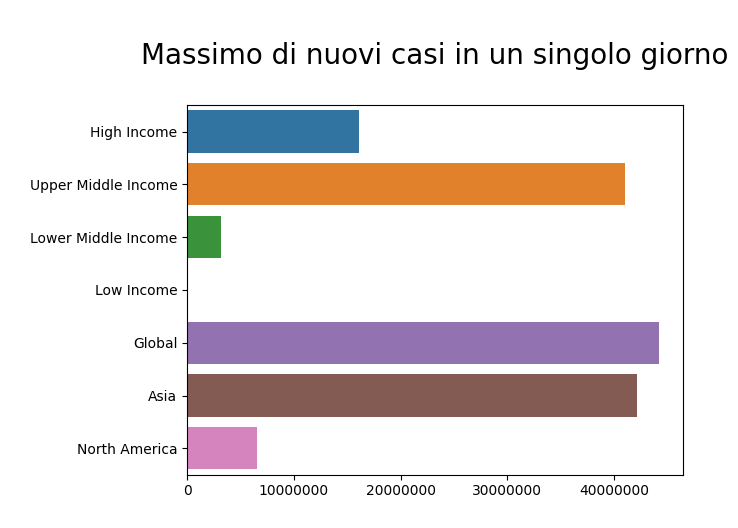

In [7]:
# Intendo valore massimo come massimo tra i giorni di new_cases
# Intendo media come (new_cases / numero di giorni in cui sono stati fatti i rilevamenti)
# Per la media nei continenti devo raggruppare per data (perché per un continente ci sono
# più location e quindi piu rilevamenti in una stessa data), farne una somma e dividere per il numero dei giorni

# Dati due continenti:
continent_a, continent_b = "North America", "Asia" 

# Creo dataframe con solo i dati dei continenti indicati
df_continent_a = df.loc[df["continent"] == continent_a]
df_continent_b = df.loc[df["continent"] == continent_b]
df_world = df.loc[df["continent"].isna() & (df["location"] == "World")]

# Casi totali
total_a = df_continent_a["new_cases"].sum()
total_b = df_continent_b["new_cases"].sum()
total_global = df.loc[df["location"] == "World"]["new_cases"].sum()

# Massimo di new_cases per giorno
max_a = df_continent_a.groupby("date")["new_cases"].sum().max()
max_b = df_continent_b.groupby("date")["new_cases"].sum().max()
max_global = df.loc[df["location"] == "World"].groupby("date")["new_cases"].sum().max()

# Media di new_cases
mean_a = df_continent_a.groupby("date")["new_cases"].sum().mean()
mean_b = df_continent_b.groupby("date")["new_cases"].sum().mean()
mean_global = df.loc[df["location"] == "World"].groupby("date")["new_cases"].sum().mean()

# Per reddito alto
high_income_max = df.loc[df["location"] == "High income"]["new_cases"].max()
high_income_mean = df.loc[df["location"] == "High income"]["new_cases"].mean()
high_income_total = df.loc[df["location"] == "High income"]["new_cases"].sum()

# Per reddito basso
low_income_max = df.loc[df["location"] == "Low income"]["new_cases"].max()
low_income_mean = df.loc[df["location"] == "Low income"]["new_cases"].mean()
low_income_total = df.loc[df["location"] == "Low income"]["new_cases"].sum()

# Per reddito medio basso
lower_middle_income_max = df.loc[df["location"] == "Lower middle income"]["new_cases"].max()
lower_middle_income_mean = df.loc[df["location"] == "Lower middle income"]["new_cases"].mean()
lower_middle_income_total = df.loc[df["location"] == "Lower middle income"]["new_cases"].sum()

# Per reddito medio alto
upper_middle_income_max = df.loc[df["location"] == "Upper middle income"]["new_cases"].max()
upper_middle_income_mean = df.loc[df["location"] == "Upper middle income"]["new_cases"].mean()
upper_middle_income_total = df.loc[df["location"] == "Upper middle income"]["new_cases"].sum()


# Creo DataFrame per i grafici
df_to_plot = pd.DataFrame(columns = ["label", "mean", "max", "total"])
df_to_plot = pd.concat([pd.DataFrame([[continent_a, mean_a, max_a, total_a]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([[continent_b, mean_b, max_b, total_b]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([["Global", mean_global, max_global, total_global]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([["Low Income", low_income_mean, low_income_max, low_income_total]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([["Lower Middle Income", lower_middle_income_mean, lower_middle_income_max, lower_middle_income_total]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([["Upper Middle Income", upper_middle_income_mean, upper_middle_income_max, upper_middle_income_total]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)
df_to_plot = pd.concat([pd.DataFrame([["High Income", high_income_mean, high_income_max, high_income_total]], columns = df_to_plot.columns), df_to_plot], ignore_index=True)

# Calcolo le percentuali per tutti
cases_percentage_a = total_a / total_global * 100
cases_percentage_b = total_b / total_global * 100
cases_percentage_lower_middle = lower_middle_income_total / total_global * 100
cases_percentage_upper_middle = upper_middle_income_total / total_global * 100
cases_percentage_low = low_income_total / total_global * 100
cases_percentage_high = high_income_total / total_global * 100

# Grafico massimi
fig, ax = plt.subplots()
ax.set(xlabel = " ", ylabel = " ")
plt.title("\nMassimo di nuovi casi in un singolo giorno\n", size = 20)
sns.barplot(df_to_plot, x = "max", y = "label", hue = "label").ticklabel_format(style='plain', axis = "x")

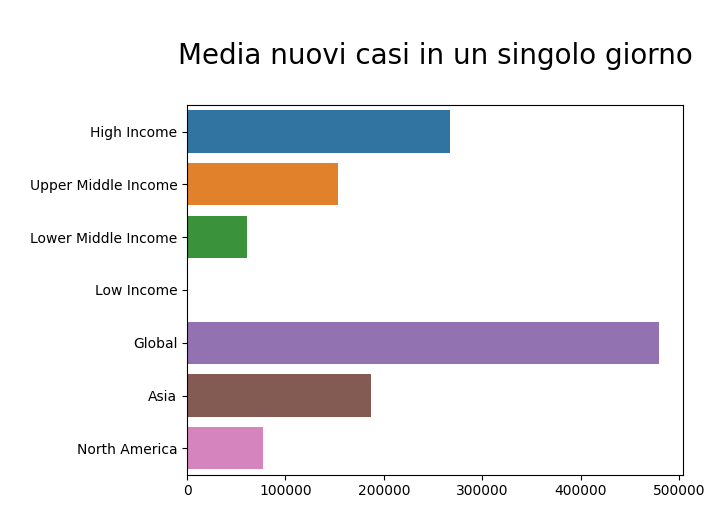

In [8]:
# Grafico medie
fig, ax = plt.subplots()
plt.title("\nMedia nuovi casi in un singolo giorno\n", size = 20)
ax.set(xlabel = " ", ylabel = " ")
sns.barplot(df_to_plot, x = "mean", y = "label", hue = "label").ticklabel_format(style='plain', axis = "x")

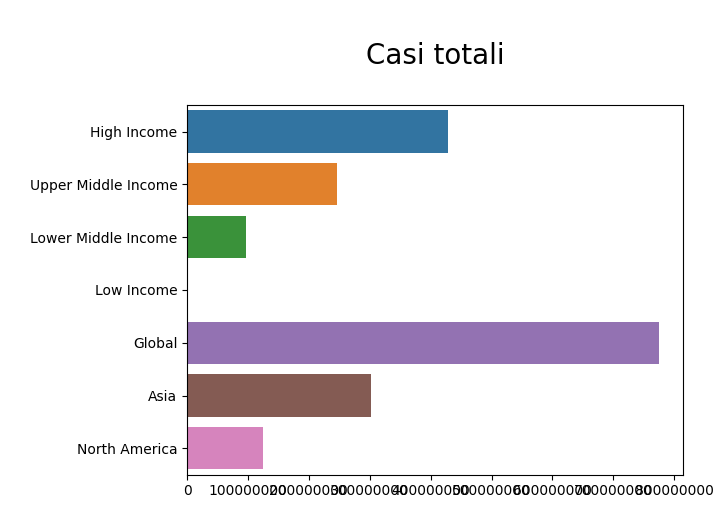

In [9]:
# Grafico casi totali
fig, ax = plt.subplots()
plt.title("\nCasi totali\n", size = 20)
ax.set(xlabel = " ", ylabel = " ")
sns.barplot(df_to_plot, x = "total", y = "label", hue = "label").ticklabel_format(style='plain', axis = "x")

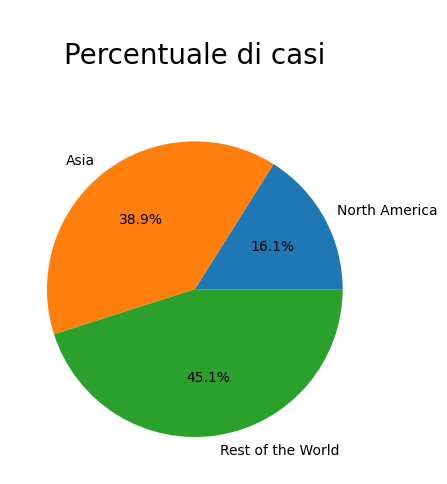

In [10]:
# Grafico percentuali casi per continente a, continente b e resto del mondo
fig, ax = plt.subplots()
plt.title("\nPercentuale di casi\n", size = 20)
plt.pie(x = [cases_percentage_a, cases_percentage_b, 100 - cases_percentage_a - cases_percentage_b], labels = [continent_a, continent_b, "Rest of the World"], autopct='%.1f%%')
plt.show()

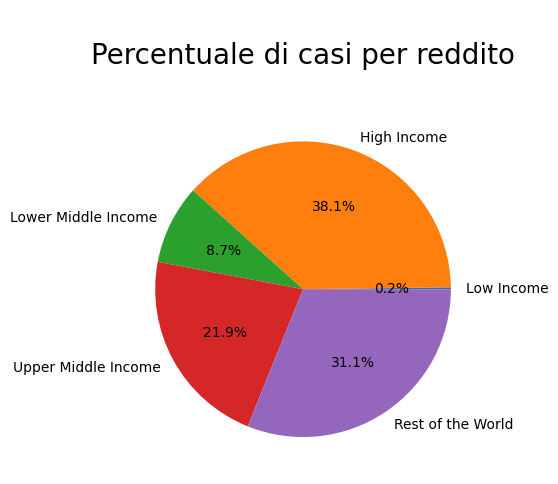

In [11]:
# Grafico percentuali casi per reddito
fig, ax = plt.subplots()
plt.title("\nPercentuale di casi per reddito\n", size = 20)
plt.pie(x = [cases_percentage_low, cases_percentage_high, cases_percentage_lower_middle, cases_percentage_upper_middle, 100 - cases_percentage_a - cases_percentage_b], labels = ["Low Income", "High Income","Lower Middle Income", "Upper Middle Income", "Rest of the World"], autopct='%.1f%%')
plt.show()

#### Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.

<AxesSubplot: title={'center': '\nAndamento Casi Totali in Italia nel 2022\n'}, xlabel='date', ylabel='total_cases'>

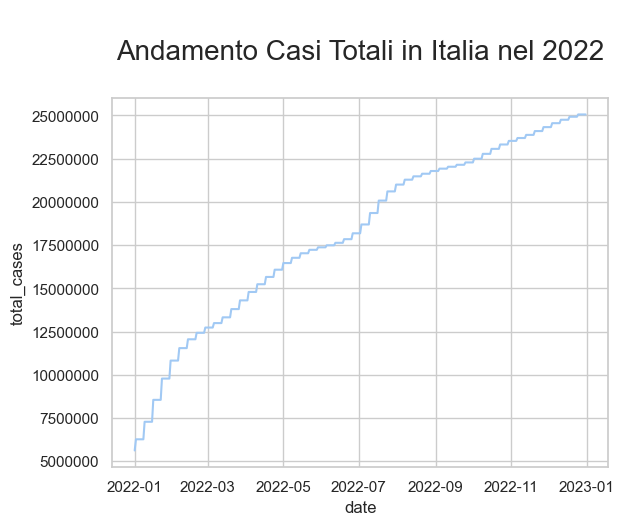

In [12]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots()
plt.title("\nAndamento Casi Totali in Italia nel 2022\n", size = 20)
ax.ticklabel_format(style='plain')
df_italy = df.loc[df["location"] == "Italy"]
to_plot_2022 = df_italy.loc[df_italy["date"].dt.year == 2022][["date", "total_cases", "new_cases"]]
plt.rc('figure', figsize=(10, 5))
sns.lineplot(x = "date", y = "total_cases", data=to_plot_2022)



##### Se volessi un grafico più liscio:

<AxesSubplot: title={'center': '\nAndamento Casi Totali in Italia nel 2022\n'}, xlabel='date', ylabel='total_cases'>

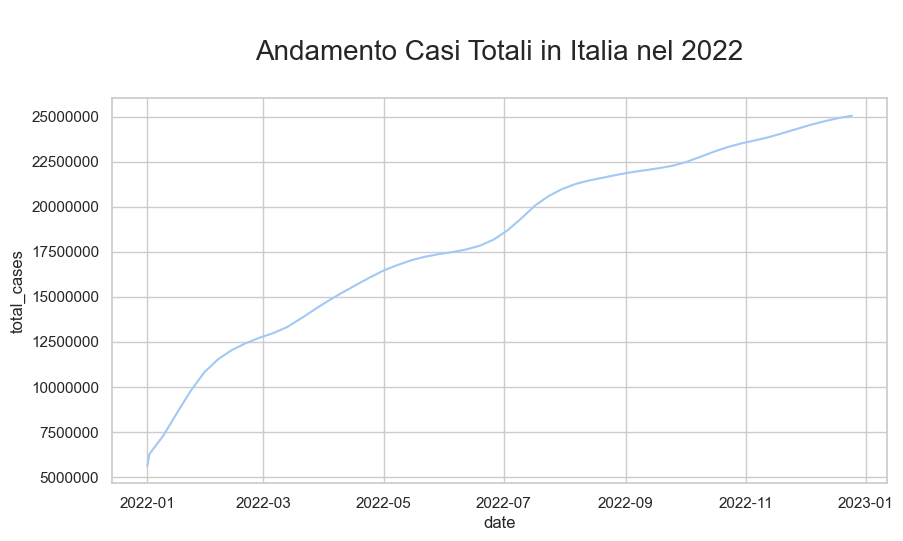

In [13]:
to_plot_2022 = to_plot_2022.drop_duplicates(subset="total_cases") # Rimuovo i giorni in cui total_cases non aumentano per evitare scalini
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.rc('figure', figsize=(10, 5))
plt.title("\nAndamento Casi Totali in Italia nel 2022\n", size = 20)
sns.lineplot(x = "date", y = "total_cases", data=to_plot_2022)

####  Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 

<BarContainer object of 53 artists>

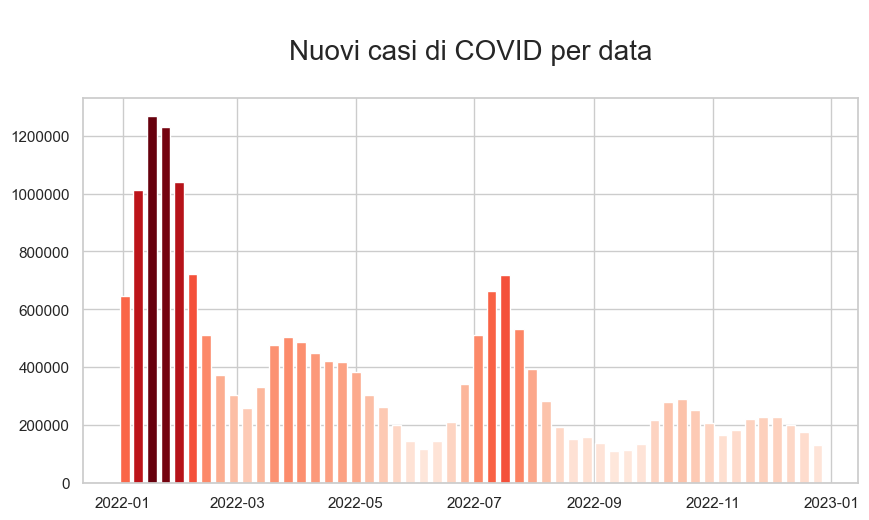

In [14]:
norm = plt.Normalize(to_plot_2022["new_cases"].min(), to_plot_2022["new_cases"].max())
cmap = plt.get_cmap("Reds")
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.title("\nNuovi casi di COVID per data\n", size = 20)
plt.rc('figure', figsize=(25, 8))
plt.bar(x = "date", height = "new_cases", width = 5, data=to_plot_2022, color = cmap(norm(to_plot_2022["new_cases"])))

#### Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [15]:
to_plot_cumsum = df_italy[["date","total_cases"]].dropna()
to_plot_cumsum["cum_sum"] = df_italy["new_cases"].cumsum()
to_plot_cumsum = to_plot_cumsum.set_index("date")

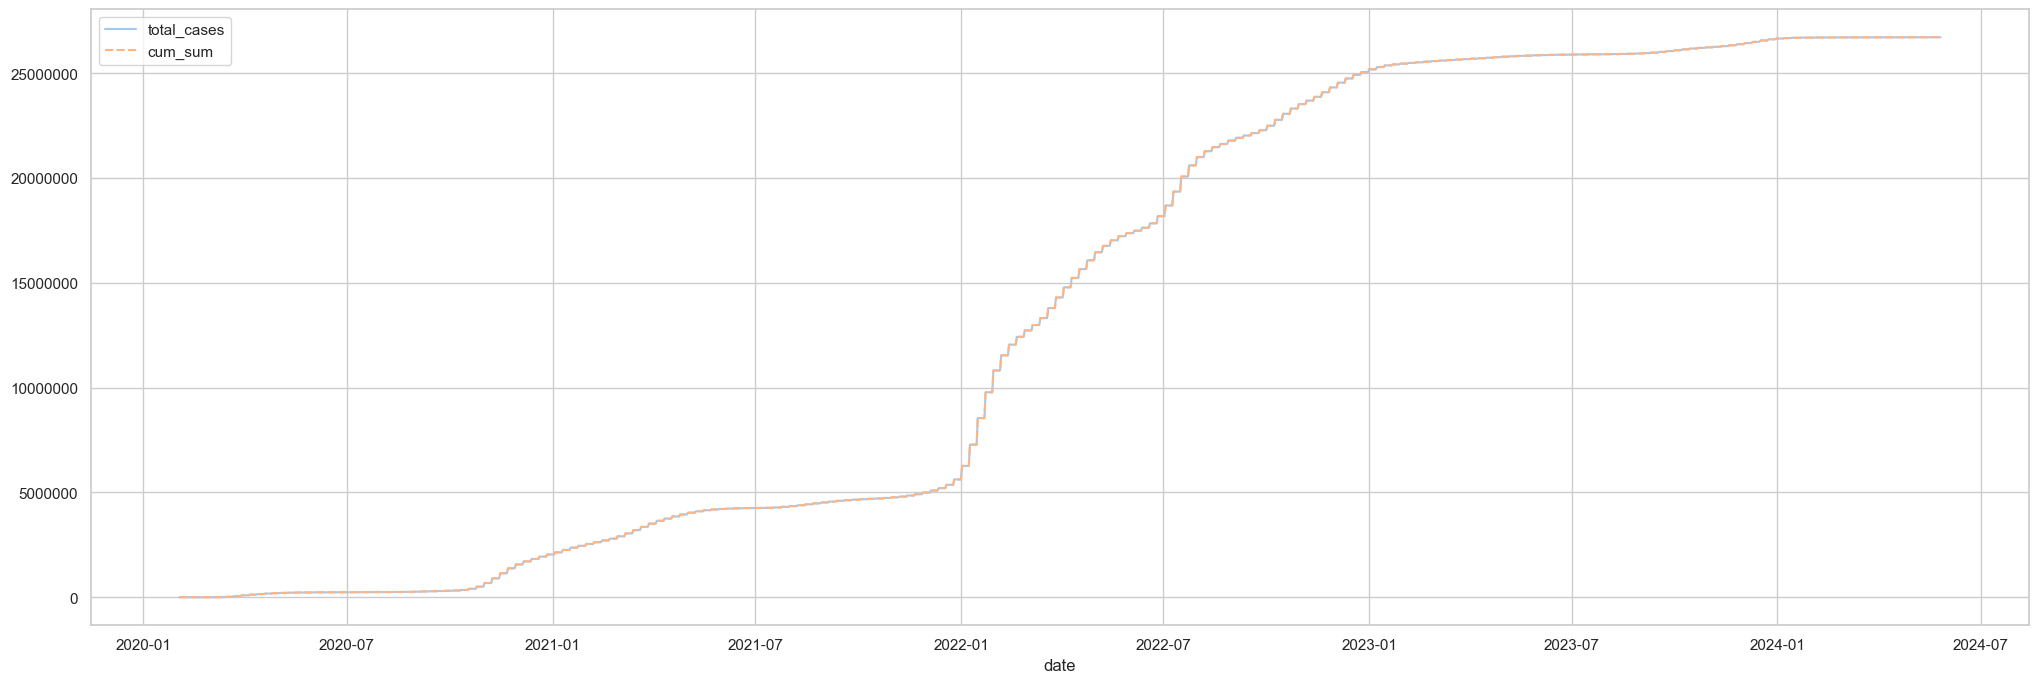

In [16]:
sns.lineplot(to_plot_cumsum).ticklabel_format(style='plain', axis = "y")

##### Sì, sono la stessa cosa, total_cases è la somma cumulativa di new_cases

#### Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

##### Utilizzo la colonna ICU patients per million per fare un confronto più oggettivo.

[Text(0.5, 0, 'Paesi')]

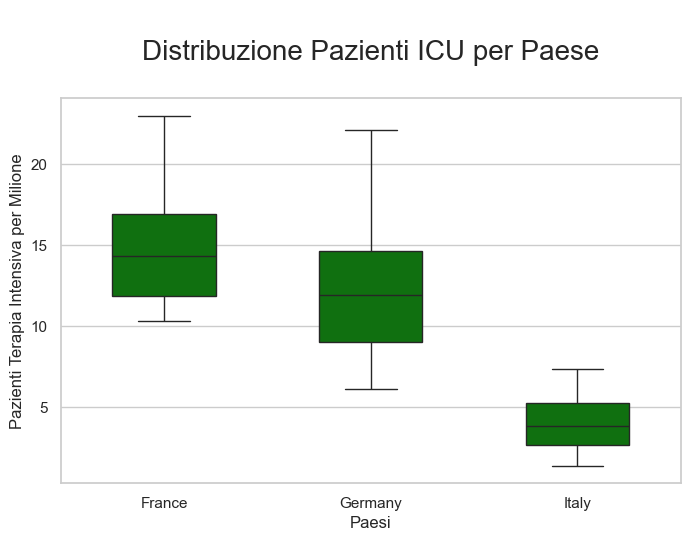

In [17]:
df_it_de_fr = df.loc[df["location"].isin(["Italy", "France", "Germany"])][["date", "location", "icu_patients_per_million"]]
date_start = pd.to_datetime("2022-05-01")
date_end = pd.to_datetime("2023-04-30")
plt.rc('figure', figsize=(8, 5))
fig, ax = plt.subplots()
df_it_de_fr = df_it_de_fr.loc[df_it_de_fr["date"].between(date_start, date_end)]
sns.boxplot(df_it_de_fr, x = "location", y = "icu_patients_per_million", color = "green", linewidth = 1, width = 0.5)
plt.title("\nDistribuzione Pazienti ICU per Paese\n", size = 20)
plt.ylabel("Pazienti Terapia Intensiva per Milione")
ax.set(xlabel = "Paesi")

##### L'italia sembra avere molti meno pazienti per giorno per milione in terapia intensiva, al contrario di Germania e Francia. La Germania ha avuto mediamente giornate peggiori rispetto agli altri due paesi. Le distribuzioni di tutte sono praticamente simmetriche attorno alle mediane con il baffo verso il massimo piu lungo rispetto al baffo verso il minimo, indicando che ci sono stati più giorni con numero maggiore di pazienti in terapia intensiva per milione<br> Possiamo fare anche un violinplot per vederne meglio le distribuzioni:

Text(0, 0.5, 'Pazienti Terapia Intensiva')

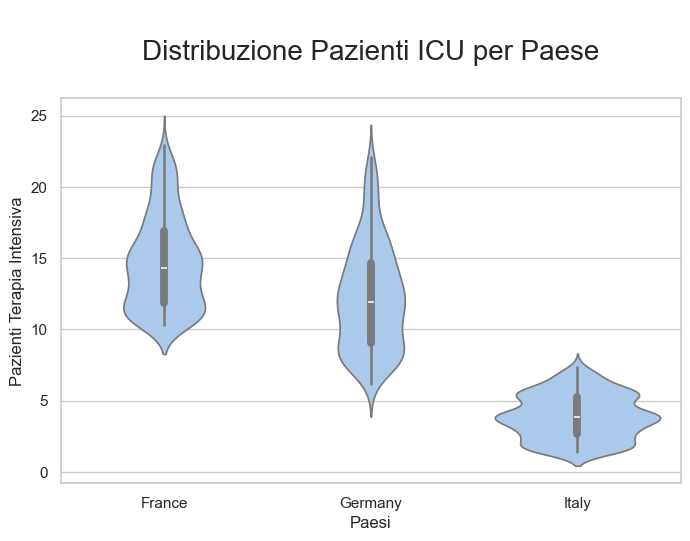

In [18]:
fig, ax = plt.subplots()
ax.set(xlabel="Paesi")
plt.title("\nDistribuzione Pazienti ICU per Paese\n", size = 20)
plt.rc('figure', figsize=(8, 5))
sns.violinplot(df_it_de_fr, x = "location", y = "icu_patients_per_million")
plt.ylabel("Pazienti Terapia Intensiva")

#### Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [19]:
df_it_ger_fr_sp = df.loc[df["location"].isin(["Italy", "France", "Germany", "Spain"])][["location", "hosp_patients"]]
#df_it_ger_fr_sp.loc[~df_it_ger_fr_sp["hosp_patients"].isna()]
df_it_ger_fr_sp.groupby("location").sum()

,hosp_patients
location,
France,19367212
Germany,0
Italy,13410152
Spain,6472838


##### Si ce ne sono per la Germania, possiamo banalmente sostituirli con 0, anche se poi non abbiamo dati effettivi purtroppo.

In [20]:
df_it_ger_fr_sp["hosp_patients"] = df_it_ger_fr_sp["hosp_patients"].fillna(0)